# Explore Processed Spectra and Metadata

This notebook visualizes processed spectral data from the HDF5 file and analyzes the distribution of stellar labels from the metadata CSV.

In [1]:
import h5py
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Define paths
data_dir = ".."
hdf5_path = os.path.join(data_dir, "processed_spectra_10k.h5")
metadata_path = os.path.join(data_dir, "raw_spectra_10k_metadata.csv")

print(f"HDF5 Path: {hdf5_path}")
print(f"Metadata Path: {metadata_path}")

HDF5 Path: ../processed_spectra_10k.h5
Metadata Path: ../raw_spectra_10k_metadata.csv


## Load Metadata
First, we load the metadata to identify available spectra and their keys.

In [6]:
# Load metadata CSV
df = pd.read_csv(metadata_path)
print(f"Loaded metadata with {len(df)} rows.")
df.head()

Loaded metadata with 10000 rows.


,star_name,Teff,logg,FeH,vmic,geometry,Ca,Mg,Si,Ti,...,C,N,Li,Nd,V,Cu,Sc,Y,hdf5_key,original_chunk
0,chunk__000,5294,2.25,-3.58,1.61,1.0,0.81,-0.47,-0.31,-1.76,...,-0.18,-1.89,0.29,-1.78,-0.23,-1.27,0.85,0.91,chunk_90_chunk__000,chunk_90
1,chunk__001,7348,1.80,-3.54,2.11,1.0,0.73,0.43,-1.95,-0.08,...,0.05,1.02,-1.15,0.30,0.66,-0.05,0.15,-1.85,chunk_90_chunk__001,chunk_90
2,chunk__002,7131,2.53,-1.23,1.74,1.0,-0.70,-1.31,-0.87,1.07,...,-0.54,1.58,-1.81,0.82,-0.84,-0.77,-0.83,-0.09,chunk_90_chunk__002,chunk_90
3,chunk__003,5010,2.41,-1.97,2.17,1.0,0.10,0.96,-0.05,1.04,...,0.50,0.66,0.92,1.07,-1.59,1.06,-0.67,-0.96,chunk_90_chunk__003,chunk_90
4,chunk__004,5476,2.17,-3.33,2.26,1.0,-0.16,-0.69,0.07,1.08,...,-0.12,-1.34,0.01,-0.84,0.82,-0.65,0.96,-0.87,chunk_90_chunk__004,chunk_90


## Visualize Spectrum
We select a spectrum using the `hdf5_key` from the metadata and plot its wavelength vs flux.

red arm not normalised well: idx = 223 (chunk_46_chunk__023), 45 (chunk_90_chunk__045)
blue arm: idx = 45 (chunk_90_chunk__045), 3465 (chunk_64_chunk__065)
green arm: idx = 0, 1, 2

In [27]:
# Select a spectrum index
idx = 3465
row = df.iloc[idx]
key = row['hdf5_key']
print(f"Visualizing spectrum for index {idx}, Key: {key}")

with h5py.File(hdf5_path, 'r') as hf:
    # Access the dataset
    # Structure is raw_spectra/{key}
    if "spectra" in hf:
        flux = np.array(hf["spectra"][idx])
        print(f"Flux shape: {flux.shape}, Flux min: {np.min(flux)}, Flux max: {np.max(flux)}")
        
    if "wavelength" in hf:
        wavelength = np.array(hf["wavelength"])
        print(f"Wavelength shape: {wavelength.shape}, Wavelength min: {np.min(wavelength)}, Wavelength max: {np.max(wavelength)}")
        plt.figure(figsize=(12, 6))
        plt.plot(wavelength, flux)
        plt.xlabel("Wavelength (Å)")
        plt.ylabel("Flux")
        plt.title(f"Processed Spectrum: {key}")
        plt.grid(True, alpha=0.3)
        plt.show()
    else:
        print("Datasets not found in HDF5.")

IndexError: single positional indexer is out-of-bounds

HDF5 Path: ../processed_spectra_1.h5
Metadata Path: ../raw_spectra_1_metadata.csv
Loaded metadata with 1 rows.
Visualizing spectrum for index 0, Key: chunk_0_chunk__000
Flux shape: (42663,), Flux min: 0.0, Flux max: 1.2087803474159147
Wavelength shape: (42663,), Wavelength min: 4040.0000000000027, Wavelength max: 6849.999999999997


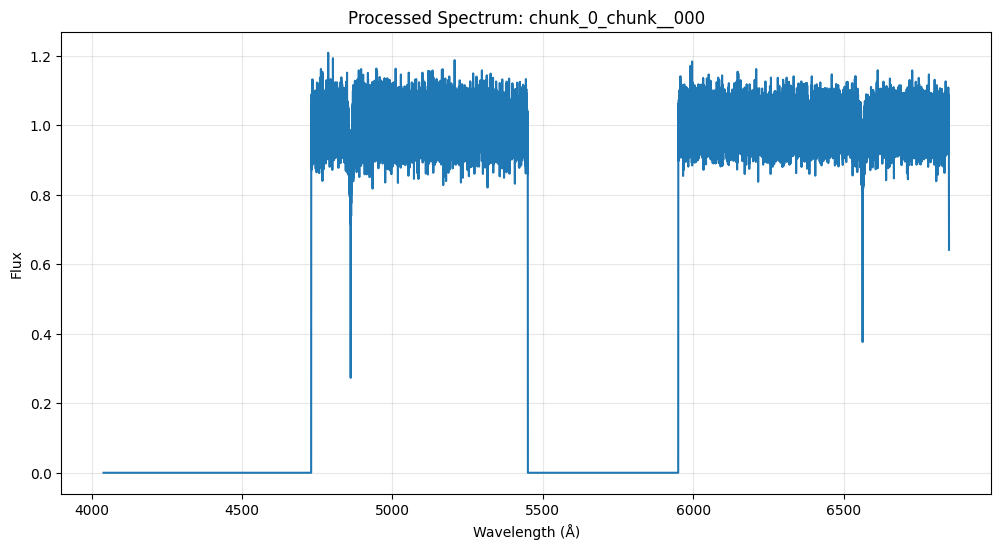

In [2]:
hdf5_path = os.path.join(data_dir, "processed_spectra_1.h5")
metadata_path = os.path.join(data_dir, "raw_spectra_1_metadata.csv")

print(f"HDF5 Path: {hdf5_path}")
print(f"Metadata Path: {metadata_path}")

# Load metadata CSV
df = pd.read_csv(metadata_path)
print(f"Loaded metadata with {len(df)} rows.")
df.head()

# Select a spectrum index
idx = 0
row = df.iloc[idx]
key = row['hdf5_key']
print(f"Visualizing spectrum for index {idx}, Key: {key}")

with h5py.File(hdf5_path, 'r') as hf:
    # Access the dataset
    # Structure is raw_spectra/{key}
    if "spectra" in hf:
        flux = np.array(hf["spectra"][idx])
        print(f"Flux shape: {flux.shape}, Flux min: {np.min(flux)}, Flux max: {np.max(flux)}")
        
    if "wavelength" in hf:
        wavelength = np.array(hf["wavelength"])
        print(f"Wavelength shape: {wavelength.shape}, Wavelength min: {np.min(wavelength)}, Wavelength max: {np.max(wavelength)}")
        plt.figure(figsize=(12, 6))
        plt.plot(wavelength, flux)
        plt.xlabel("Wavelength (Å)")
        plt.ylabel("Flux")
        plt.title(f"Processed Spectrum: {key}")
        plt.grid(True, alpha=0.3)
        plt.show()
    else:
        print("Datasets not found in HDF5.")

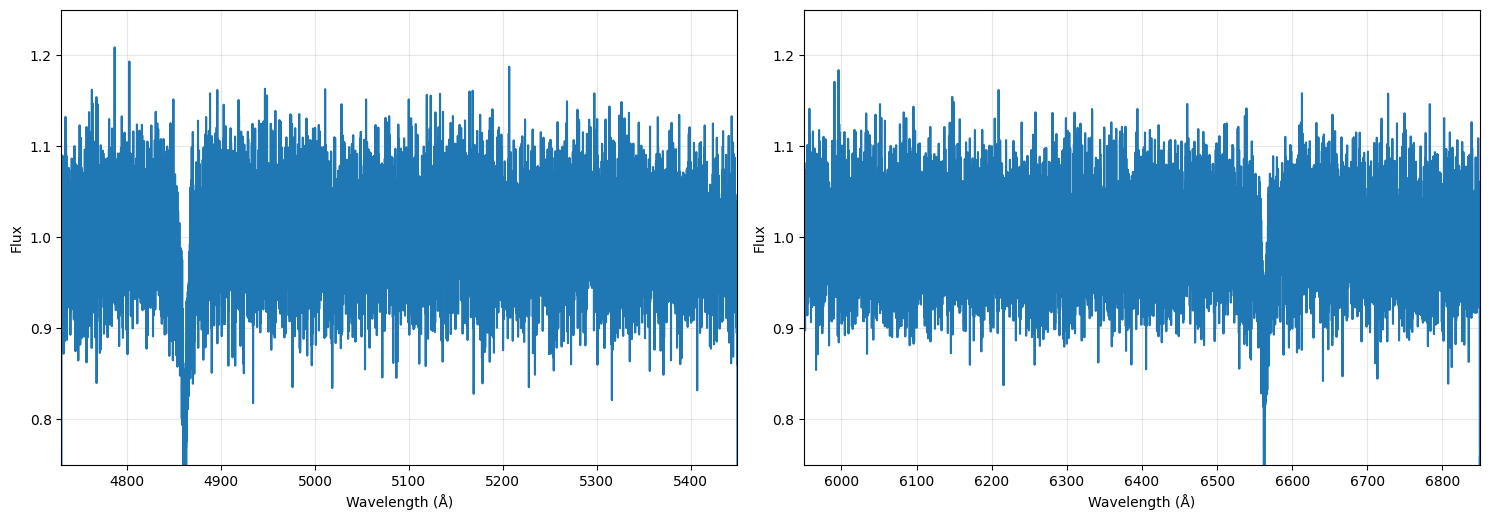

In [3]:
# Arm Definitions (Angstroms)
BLUE_ARM = (4040, 4650)
GREEN_ARM = (4730, 5450)
RED_ARM = (5950, 6850)

green = True
blue = False

plt.figure(figsize=(15, 10))

if green:
    plt.subplot(2, 2, 1)
    plt.plot(wavelength, flux)
    plt.xlabel("Wavelength (Å)")
    plt.ylabel("Flux")
    plt.grid(True, alpha=0.3)
    plt.ylim(0.75, 1.25)
    plt.xlim(GREEN_ARM)
elif blue:
    plt.subplot(2, 2, 1)
    plt.plot(wavelength, flux)
    plt.xlabel("Wavelength (Å)")
    plt.ylabel("Flux")
    plt.grid(True, alpha=0.3)
    plt.ylim(0.75, 1.25)
    plt.xlim(BLUE_ARM)
    
plt.subplot(2, 2, 2)
plt.plot(wavelength, flux)
plt.xlabel("Wavelength (Å)")
plt.ylabel("Flux")
plt.grid(True, alpha=0.3)
plt.ylim(0.75, 1.25)
plt.xlim(RED_ARM)
plt.tight_layout()
plt.show()